# STATS MINI PROJECT

In [1]:
import pandas as pd 

# import 'numpy' 
import numpy as np

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# import 'stats' package from scipy library
from scipy import stats
import statistics

# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

# function to perform post-hoc test
import statsmodels.stats.multicomp as mc
from scipy.stats import randint
import random

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data= pd.read_csv('fifa_stats.csv')
data.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


# BASIC EDA

In [5]:
data.isnull().sum()/len(data)*100

Name                        0.00
Age                         0.00
Nationality                 0.00
Overall_rating              0.00
Potential                   0.00
Club                        0.95
Preferred Foot              0.00
International Reputation    0.00
Weak Foot                   0.00
Skill Moves                 0.00
Work Rate                   0.00
Position                    0.00
Jersey Number               0.00
Height                      0.00
Weight                      0.00
dtype: float64

In [6]:
len(data)

2000

In [ ]:
# the % of missing values is less 10% we ingore it.

In [7]:
data.shape

(2000, 15)

In [8]:
data.dtypes

Name                         object
Age                           int64
Nationality                  object
Overall_rating                int64
Potential                     int64
Club                         object
Preferred Foot               object
International Reputation      int64
Weak Foot                     int64
Skill Moves                   int64
Work Rate                    object
Position                     object
Jersey Number                 int64
Height                      float64
Weight                        int64
dtype: object

In [ ]:
# All the data types are assigned appropriately hence not doing any modifications.

a)	Assuming age as population, perform the central limit theorem with sample size of 200. Find the standard error and the mean of sampling distribution. Compare the results with population mean and standard deviation. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size

In [24]:
random.seed(1)
n= 200
alpha = 0.05
random_sample = random.sample(population = list(data['Age']),k=200)
print(random_sample)
sample_mean = np.mean(random_sample)
sample_std= statistics.stdev(random_sample)
print("Sample Mean",sample_mean)
print('Sample Std',sample_std)
pop_mean = np.mean(data['Age'])
pop_std = np.std(data['Age'])
print("Population Mean",pop_mean)
print('Poplulation Std',pop_std)

[26, 30, 20, 26, 20, 30, 32, 24, 32, 25, 32, 23, 34, 22, 30, 21, 26, 27, 26, 26, 26, 24, 30, 29, 27, 33, 27, 30, 29, 33, 31, 27, 25, 23, 34, 31, 33, 27, 25, 25, 30, 26, 27, 26, 30, 28, 25, 26, 23, 26, 40, 30, 26, 26, 22, 29, 28, 24, 26, 32, 29, 25, 24, 32, 25, 28, 28, 27, 29, 27, 28, 27, 21, 24, 29, 25, 24, 27, 22, 28, 24, 22, 28, 29, 28, 25, 25, 30, 26, 24, 30, 28, 25, 29, 27, 29, 29, 25, 29, 27, 25, 26, 25, 28, 24, 31, 28, 27, 31, 25, 27, 30, 29, 26, 21, 24, 30, 34, 29, 28, 23, 23, 31, 31, 26, 35, 30, 23, 23, 37, 28, 28, 24, 23, 27, 30, 25, 29, 31, 26, 31, 25, 28, 27, 25, 25, 32, 23, 19, 24, 31, 23, 21, 24, 24, 26, 26, 31, 23, 34, 30, 37, 34, 33, 29, 36, 28, 28, 29, 30, 27, 29, 20, 20, 25, 33, 25, 27, 27, 25, 27, 21, 34, 33, 22, 23, 32, 23, 22, 30, 28, 32, 30, 23, 26, 32, 27, 19, 29, 27]
Sample Mean 27.27
Sample Std 3.7237658574088703
Population Mean 27.2315
Poplulation Std 3.8580963894127795


In [25]:
z = (sample_mean - pop_mean)/(sample_std/np.sqrt(n))
print("Central Limit Theorem Z:",z)
standard_error = pop_std/np.sqrt(n)
print("Standard error:",standard_error)

Central Limit Theorem Z: 0.1462154824880671
Standard error: 0.2728086119425111


In [ ]:
# Population parameter is equal to sample statistics.
# As the sample size increases , it slowly matches with the size of the poplutaion and hence there will be
# no much difference between sample and poplulation , hence the standard error in inversely proportional to sample size.

b)	Is there any evidence that the players overall rating is greater than 80?

In [31]:
# H0 Average rating is <=80
# H1 Average rating is >80

# Considering the sample size to be 200
# As sample is greater than 30 we are going with z test.
random.seed(1)
random_s = random.sample(population=list(data['Overall_rating']),k=200)
pop_std= np.std(data['Overall_rating'])
pop_mean = np.mean(data['Overall_rating'])
samp_mean= np.mean(random_s)
alpha = 0.05
n=200
print(random_sample)
print("Sample Mean",samp_mean)
print("Population Mean",pop_mean)
print('Poplulation Std',pop_std)

[26, 30, 20, 26, 20, 30, 32, 24, 32, 25, 32, 23, 34, 22, 30, 21, 26, 27, 26, 26, 26, 24, 30, 29, 27, 33, 27, 30, 29, 33, 31, 27, 25, 23, 34, 31, 33, 27, 25, 25, 30, 26, 27, 26, 30, 28, 25, 26, 23, 26, 40, 30, 26, 26, 22, 29, 28, 24, 26, 32, 29, 25, 24, 32, 25, 28, 28, 27, 29, 27, 28, 27, 21, 24, 29, 25, 24, 27, 22, 28, 24, 22, 28, 29, 28, 25, 25, 30, 26, 24, 30, 28, 25, 29, 27, 29, 29, 25, 29, 27, 25, 26, 25, 28, 24, 31, 28, 27, 31, 25, 27, 30, 29, 26, 21, 24, 30, 34, 29, 28, 23, 23, 31, 31, 26, 35, 30, 23, 23, 37, 28, 28, 24, 23, 27, 30, 25, 29, 31, 26, 31, 25, 28, 27, 25, 25, 32, 23, 19, 24, 31, 23, 21, 24, 24, 26, 26, 31, 23, 34, 30, 37, 34, 33, 29, 36, 28, 28, 29, 30, 27, 29, 20, 20, 25, 33, 25, 27, 27, 25, 27, 21, 34, 33, 22, 23, 32, 23, 22, 30, 28, 32, 30, 23, 26, 32, 27, 19, 29, 27]
Sample Mean 77.965
Population Mean 78.197
Poplulation Std 3.285147028673068


In [34]:
# critical value

z_alpha = stats.norm.isf(q=0.05)
print('Critical value:',z_alpha)

# Test statistics

z_score = (samp_mean - pop_mean) / (pop_std / np.sqrt(n))
print("Zscore :",z_score)

Critical value: 1.6448536269514729
Zscore : -0.9987301743480316


In [35]:
# p value

p_val = stats.norm.sf(z_score)
print("Pvalue :",p_val)

Pvalue : 0.8410372903518588


In [ ]:
# Pval > 0.05 and zscore lies in the critical region i.e acceptance region
# We fail to reject null hypothesis.

c)	Perform the statistical test to identify whether preferred foot has any impact on potential. Also, perform the graphical analysis.

In [36]:
data['Preferred Foot'].value_counts()

Right    1534
Left      466
Name: Preferred Foot, dtype: int64

In [37]:
# Performing Anova test
# Check for normality

print(stats.shapiro(data['Potential']))

ShapiroResult(statistic=0.9384800791740417, pvalue=5.016414837142018e-28)


In [38]:
# The pval is < 0.05 hence the data is not normally distributed.
# Hence We will perform Krushkal's wallis test

# H0: Two average are equal / They have no impact
# H1 : Atleast one is not equal / They have imapct 

df1 = data[data['Preferred Foot']=='Right']['Potential']
df2 = data[data['Preferred Foot']=='Left']['Potential']

In [39]:
stats.kruskal(df1,df2)

KruskalResult(statistic=1.481069098122691, pvalue=0.22360732687859053)

In [ ]:
# We fail to reject Null hypothesis.
# I.e Preferred Foot has not impact on the potential.

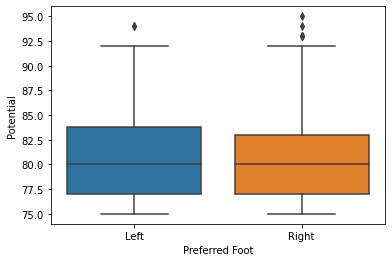

In [43]:
# Perform Graphical Analysis.
sns.boxplot(data['Preferred Foot'],data['Potential'],data=data)
plt.show()

In [ ]:
# As we can see the medians of both the foot are equal. Hence there is no impact on potential based on foot.

d)	Perform the statistical test to identify the relation between the overall rating and potential. [Assume both are continuous data points].

In [44]:
# Checking for noramlity

print(stats.shapiro(data['Overall_rating']))
print(stats.shapiro(data['Potential']))

ShapiroResult(statistic=0.8525537848472595, pvalue=1.0221183102662362e-39)
ShapiroResult(statistic=0.9384800791740417, pvalue=5.016414837142018e-28)


In [45]:
# As the data is not normally distributed we will make use of spearman correlation method

data[['Overall_rating','Potential']].corr(method='spearman')

,Overall_rating,Potential
Overall_rating,1.000000,0.690448
Potential,0.690448,1.000000


In [ ]:
# Overall rating and Portential are Strong Positively correlated. 0.69

e)	Does skill move have any effect in overall rating. Perform the graphical analysis and the statistical analysis.

In [46]:
# Checking for normality

print(stats.shapiro(data['Overall_rating']))

ShapiroResult(statistic=0.8525537848472595, pvalue=1.0221183102662362e-39)


In [48]:
# As the data is not normally distributed we are going with kruskal wallis test
# H0 : The aerages are equal / Skill move has not effect on Overall rating
# H1 : Atleast one average is not equal /Skill move has effect on Overall rating

data['Skill Moves'].value_counts()

3    828
4    544
2    395
1    194
5     39
Name: Skill Moves, dtype: int64

In [49]:
df1=data[data['Skill Moves']==1]['Overall_rating']
df2=data[data['Skill Moves']==2]['Overall_rating']
df3=data[data['Skill Moves']==3]['Overall_rating']
df4=data[data['Skill Moves']==4]['Overall_rating']
df5=data[data['Skill Moves']==5]['Overall_rating']

In [50]:
stats.kruskal(df1,df2,df3,df4,df5)

KruskalResult(statistic=104.85780927711181, pvalue=9.082225777036205e-22)

In [ ]:
# As p val < 0.05 we reject null hypothesis . ie the Skill move has effect on Overall rating.

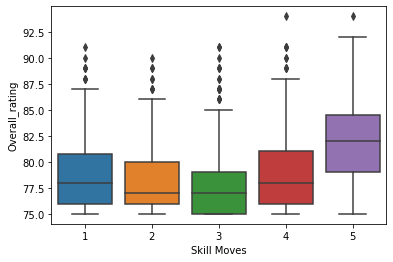

In [52]:
# Graphical Analysis

sns.boxplot(data['Skill Moves'],data['Overall_rating'])
plt.show()  

In [ ]:
# As the Medians are different we can infer that the Skill Moves has an effect on overall rating.

In [129]:
df= pd.read_csv('phone.csv')
df.head()

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile


# BASIC EDA

In [122]:
df.isnull().sum()

date            0
duration        0
item            0
month           0
network         0
network_type    0
dtype: int64

In [ ]:
# There are no null values

In [123]:
df.dtypes

date             object
duration        float64
item             object
month            object
network          object
network_type     object
dtype: object

In [94]:
df['date']=pd.to_datetime(df['date'])

In [95]:
df.dtypes

date            datetime64[ns]
duration               float64
item                    object
month                   object
network                 object
network_type            object
dtype: object

In [96]:
df['month'].sample(3)

276    2014-12
623    2015-02
96     2014-11
Name: month, dtype: object

In [97]:
df['month']=pd.to_datetime(df['month'].str.upper(), format='%Y-%m', yearfirst=False)

In [98]:
df['month'].sample(3)

410   2015-01-01
642   2015-02-01
646   2015-02-01
Name: month, dtype: datetime64[ns]

In [99]:
# Performed Basic EDA stpes by checking for null values , and there were non.
# Checked for data type and changed month and date data type to datetime format.

a) With 95% & 99% Confidence Interval find the range estimate of average duration calls made by all the network. Which of the Intervals are wider? Interpret the results.

In [100]:
len(df['duration'])

820

In [70]:
random.seed(1)
random_s=random.sample(population=list(df['duration']),k=82)
print(random_sample)
sample_mean=np.mean(random_sample)
pop_std=np.std(df['duration'])
pop_mean=np.mean(df['duration'])
print('Sample mean',sample_mean)
print('Population mean',pop_mean)
print('Popluation std:',pop_std)

[26, 30, 20, 26, 20, 30, 32, 24, 32, 25, 32, 23, 34, 22, 30, 21, 26, 27, 26, 26, 26, 24, 30, 29, 27, 33, 27, 30, 29, 33, 31, 27, 25, 23, 34, 31, 33, 27, 25, 25, 30, 26, 27, 26, 30, 28, 25, 26, 23, 26, 40, 30, 26, 26, 22, 29, 28, 24, 26, 32, 29, 25, 24, 32, 25, 28, 28, 27, 29, 27, 28, 27, 21, 24, 29, 25, 24, 27, 22, 28, 24, 22, 28, 29, 28, 25, 25, 30, 26, 24, 30, 28, 25, 29, 27, 29, 29, 25, 29, 27, 25, 26, 25, 28, 24, 31, 28, 27, 31, 25, 27, 30, 29, 26, 21, 24, 30, 34, 29, 28, 23, 23, 31, 31, 26, 35, 30, 23, 23, 37, 28, 28, 24, 23, 27, 30, 25, 29, 31, 26, 31, 25, 28, 27, 25, 25, 32, 23, 19, 24, 31, 23, 21, 24, 24, 26, 26, 31, 23, 34, 30, 37, 34, 33, 29, 36, 28, 28, 29, 30, 27, 29, 20, 20, 25, 33, 25, 27, 27, 25, 27, 21, 34, 33, 22, 23, 32, 23, 22, 30, 28, 32, 30, 23, 26, 32, 27, 19, 29, 27]
Sample mean 27.27
Population mean 144.30493555983546
Popluation std: 45.65990992661172


In [69]:
interval = stats.norm.interval(0.95,loc=sample_mean,scale=(pop_std/np.sqrt(82)))
print('95% interval:',interval)
interval_1 = stats.norm.interval(0.99,loc=sample_mean,scale=(pop_std/np.sqrt(82)))
print('99% interval:',interval_1)

95% interval: (17.387286274594693, 37.152713725405306)
99% interval: (14.28191255896586, 40.258087441034135)


In [ ]:
# 99 % confidence interval is wider than compared to 95%

b) Perform statistical analysis to check whether the networks are equally distributed in the dataset.

In [71]:
df['network'].value_counts()

Three        215
Vodafone     215
data         150
Meteor        87
Tesco         84
landline      42
voicemail     27
Name: network, dtype: int64

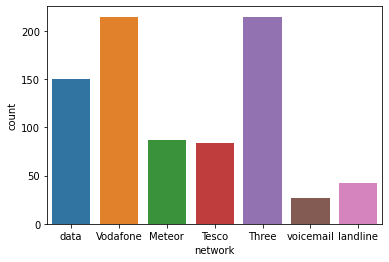

In [72]:
sns.countplot(df['network'])
plt.show()

In [130]:
# one sample chi-square
n = len(df['network'])
print(n)

820


In [131]:
observed = df['network'].value_counts().values
print(observed)
expected_freq = []
expected_freq.append(n/len(observed))
print(expected_freq)
expected =expected_freq*7
print(expected)
print(stats.chisquare(f_obs=observed,f_exp=expected))

[215 215 150  87  84  42  27]
[117.14285714285714]
[117.14285714285714, 117.14285714285714, 117.14285714285714, 117.14285714285714, 117.14285714285714, 117.14285714285714, 117.14285714285714]
Power_divergenceResult(statistic=307.409756097561, pvalue=2.112592760257685e-63)


In [132]:
#as p_val < 0.05 we reject null hypothesis that is the data is not equally distributed

c) Plot the distribution of duration with respect to each network in the same graph and Interpret the results from the graph.

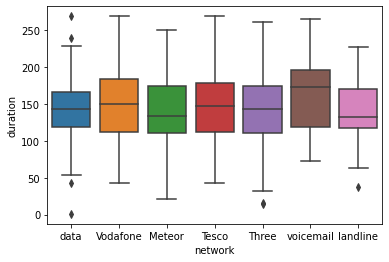

In [73]:
sns.boxplot(df['network'],df['duration'])
plt.show()

In [ ]:
# Data , Vodafone,Tesco , Three all these are almost equal medians.
# Voicemail has the highest median
# Landline the lowest median
# The spread of data in vodafone and voice mail are more compared the the rest
# # We can observe few outliers in Data

d)	Perform statistical tests to identify the relation between item and duration. Detailed 
explanation of relation between the classes is required.

In [75]:
# As the samples are more than 2 we are going with ANOVA test
# Checking for normality

# H0 : all the averages are equal / There is no relation ship btw the variables 
# H1 : Atleast one of the averages are not equal / There is  relation ship btw the variables 

print(stats.shapiro(df['duration']))

ShapiroResult(statistic=0.9984679818153381, pvalue=0.701244592666626)


In [ ]:
# The p val >0.05 hence it is normally distributed.

In [76]:
df['item'].value_counts()

call    388
sms     282
data    150
Name: item, dtype: int64

In [77]:
df1=df[df['item']=='call']['duration']
df2=df[df['item']=='sms']['duration']
df3=df[df['item']=='data']['duration']

In [78]:
# Equality of variance
print(stats.levene(df1,df2,df3))

LeveneResult(statistic=3.4300976447008478, pvalue=0.03285087780533987)


In [79]:
stats.f_oneway(df1,df2,df3)

F_onewayResult(statistic=1.9313964906864995, pvalue=0.1456068656611744)

In [ ]:
# We fail to reject null hypothesis i.e there is no relation between variables

e)	Perform statistical tests to identify the relation between network and network_type

In [124]:
pd.crosstab(df['network_type'],df['network'])

network,Meteor,Tesco,Three,Vodafone,data,landline,voicemail
network_type,,,,,,,
data,0,0,0,0,150,0,0
landline,0,0,0,0,0,42,0
mobile,87,84,215,215,0,0,0
voicemail,0,0,0,0,0,0,27


In [125]:
chivalue,p,df,expected=stats.chi2_contingency(pd.crosstab(df['network_type'],df['network']))
print('Chi:',chivalue)
print('P value',p)
print('df:',df)
print('expected',expected)

Chi: 2460.0
P value 0.0
df: 18
expected [[ 15.91463415  15.36585366  39.32926829  39.32926829  27.43902439
    7.68292683   4.93902439]
 [  4.45609756   4.30243902  11.01219512  11.01219512   7.68292683
    2.15121951   1.38292683]
 [ 63.76463415  61.56585366 157.57926829 157.57926829 109.93902439
   30.78292683  19.78902439]
 [  2.86463415   2.76585366   7.07926829   7.07926829   4.93902439
    1.38292683   0.88902439]]


In [ ]:
# Rejecting Null hypothesis and saying there is a relation btw these two variables